## Tutorial: Learn ML from Scratch with IRIS Dataset
[Kaggle Tutorial link](https://www.kaggle.com/code/suneelpatel/learn-ml-from-scratch-with-iris-dataset)

In [75]:
import os
print(os.listdir("input/"))


['Iris.csv']


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


In [77]:
#Loading dataset
iris = pd.read_csv('input/Iris.csv')

In [78]:
# View the number of rows and columns
iris.shape
# View the first 5 examples or rows
iris.head()
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


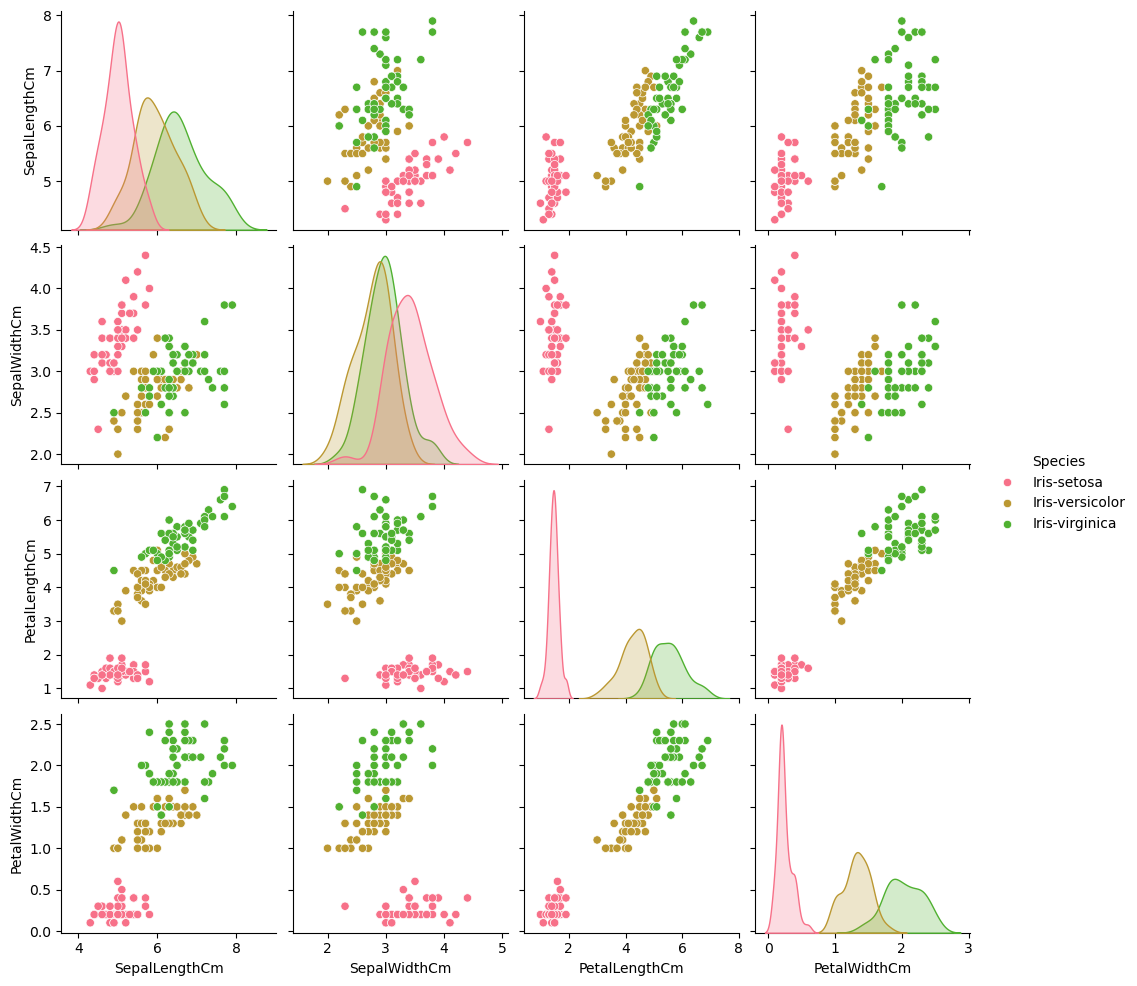

In [79]:
iris1 = iris.drop('Id', axis=1)
g = sns.pairplot(iris1, hue="Species", markers='o')

plt.show()

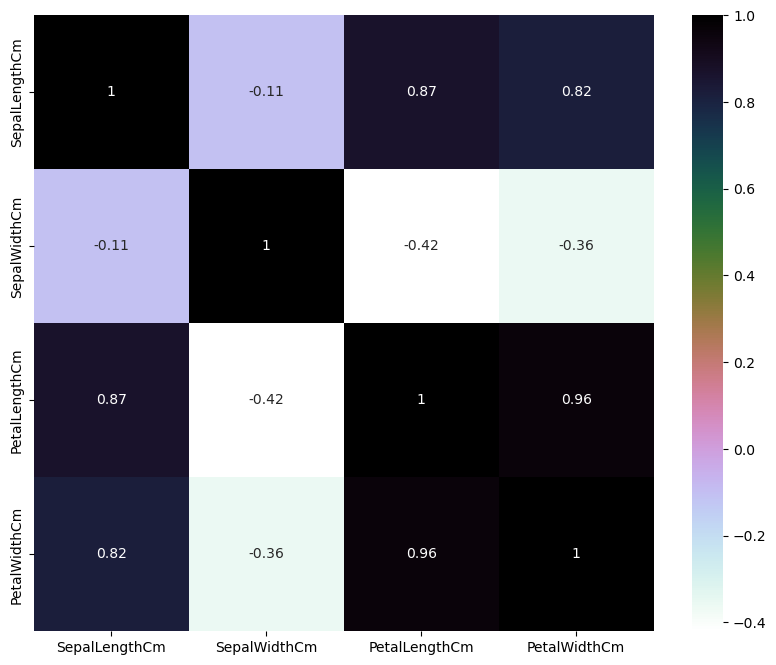

In [80]:
# We use the variance matrix to know how related the features are
iris1 = iris1.drop('Species', axis=1)
plt.figure(figsize=(10,8)) 
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# The sepal width and length are not correlated while the petal width and length are
# This means that we can use the Petal features to check the accuracy of the algor


**Steps to train a model using Scikit-learn**
- 1: Split the dataset into the training and testing set.
- 2: Choose the right algorithm category: (Classification of regression )
- 3: Pass the training set to the algorithm. Using for example the `.fit()`
- 4: Evaluate the algorithm by using the `.predict()` function over the test set
-4: Check the accuracy by passing the predicted outcome and the actual output to the algorith

In [81]:
# 1- Split the training set

from sklearn.model_selection import train_test_split


X = iris.drop(['Id', 'Species'], axis=1) 
y = iris['Species']

print(X.shape)
print(y.shape)


# Training set is 70% and testing set is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

(150, 4)
(150,)


In [82]:
from sklearn import metrics


# Training with the Logistic Regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train) # Train the model
y_pred = logr.predict(X_test) # The model makes predictions
acc_logr = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Logistic Regression is: ', acc_logr)

The accuracy of the Logistic Regression is:  1.0


In [83]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred, y_test)
print("The accuracy of the Decision Tree is: ", acc_dt)

The accuracy of the Decision Tree is:  0.9777777777777777


In [84]:
from sklearn import svm


sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
acc_svm = metrics.accuracy_score(y_pred,y_test)

print("The accuracy of the SVM is: ", acc_svm)

The accuracy of the SVM is:  1.0


In [87]:
from sklearn.neighbors import KNeighborsClassifier



knc = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the KNN is', acc_knn)



The accuracy of the KNN is 0.9777777777777777


In [90]:


models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [acc_logr, acc_dt, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)



,Model,Score
0,Logistic Regression,1.000000
2,Support Vector Machines,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
